Project Goal (Main Objective)

The goal of the IBM HR Analytics Attrition Project is to understand the factors that influence employee attrition that is, why employees leave the company.

Business Understanding

Employee turnover (attrition) is costly for companies because they spend time and money hiring and training new employees.
By analyzing HR data, the company can identify patterns that lead to attrition and take preventive actions like improving working conditions, salary structures, or management style.

In [1]:
library(tidyverse)
library(skimr)
library(corrplot)
library(forcats)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


ERROR: Error in library(skimr): there is no package called ‘skimr’


In [3]:
data <- read.csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [8]:
head(data)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,⋯,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,⋯,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,⋯,4,80,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,⋯,2,80,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,⋯,3,80,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,⋯,4,80,1,6,3,3,2,2,2,2
6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,⋯,3,80,0,8,2,2,7,7,3,6


In [4]:
glimpse(data)

Rows: 1,470
Columns: 35
$ Age                      <int> 41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2…
$ Attrition                <chr> "Yes", "No", "Yes", "No", "No", "No", "No", "…
$ BusinessTravel           <chr> "Travel_Rarely", "Travel_Frequently", "Travel…
$ DailyRate                <int> 1102, 279, 1373, 1392, 591, 1005, 1324, 1358,…
$ Department               <chr> "Sales", "Research & Development", "Research …
$ DistanceFromHome         <int> 1, 8, 2, 3, 2, 2, 3, 24, 23, 27, 16, 15, 26, …
$ Education                <int> 2, 1, 2, 4, 1, 2, 3, 1, 3, 3, 3, 2, 1, 2, 3, …
$ EducationField           <chr> "Life Sciences", "Life Sciences", "Other", "L…
$ EmployeeCount            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ EmployeeNumber           <int> 1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,…
$ EnvironmentSatisfaction  <int> 2, 3, 4, 4, 1, 4, 3, 4, 4, 3, 1, 4, 1, 2, 3, …
$ Gender                   <chr> "Female", "Male", "Male", "Female", "Male", "…
$ HourlyRate    

In [5]:
summary(data)

      Age         Attrition         BusinessTravel       DailyRate     
 Min.   :18.00   Length:1470        Length:1470        Min.   : 102.0  
 1st Qu.:30.00   Class :character   Class :character   1st Qu.: 465.0  
 Median :36.00   Mode  :character   Mode  :character   Median : 802.0  
 Mean   :36.92                                         Mean   : 802.5  
 3rd Qu.:43.00                                         3rd Qu.:1157.0  
 Max.   :60.00                                         Max.   :1499.0  
  Department        DistanceFromHome   Education     EducationField    
 Length:1470        Min.   : 1.000   Min.   :1.000   Length:1470       
 Class :character   1st Qu.: 2.000   1st Qu.:2.000   Class :character  
 Mode  :character   Median : 7.000   Median :3.000   Mode  :character  
                    Mean   : 9.193   Mean   :2.913                     
                    3rd Qu.:14.000   3rd Qu.:4.000                     
                    Max.   :29.000   Max.   :5.000              

In [6]:
skim(data)

ERROR: Error in skim(data): could not find function "skim"


In [7]:
colSums(is.na(data))

Age                Attrition           BusinessTravel 
                       0                        0                        0 
               DailyRate               Department         DistanceFromHome 
                       0                        0                        0 
               Education           EducationField            EmployeeCount 
                       0                        0                        0 
          EmployeeNumber  EnvironmentSatisfaction                   Gender 
                       0                        0                        0 
              HourlyRate           JobInvolvement                 JobLevel 
                       0                        0                        0 
                 JobRole          JobSatisfaction            MaritalStatus 
                       0                        0                        0 
           MonthlyIncome              MonthlyRate       NumCompaniesWorked 
                       0                        0                        0 
                  Over18                 OverTime        PercentSalaryHike 
                       0                        0                        0 
       PerformanceRating RelationshipSatisfaction            StandardHours 
                       0                        0                        0 
        StockOptionLevel        TotalWorkingYears    TrainingTimesLastYear 
                       0                        0                        0 
         WorkLifeBalance           YearsAtCompany       YearsInCurrentRole 
                       0                        0                        0 
 YearsSinceLastPromotion     YearsWithCurrManager 
                       0                        0

1. Univariate Analysis

What is the age of employees?

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   30.00   36.00   36.92   43.00   60.00 

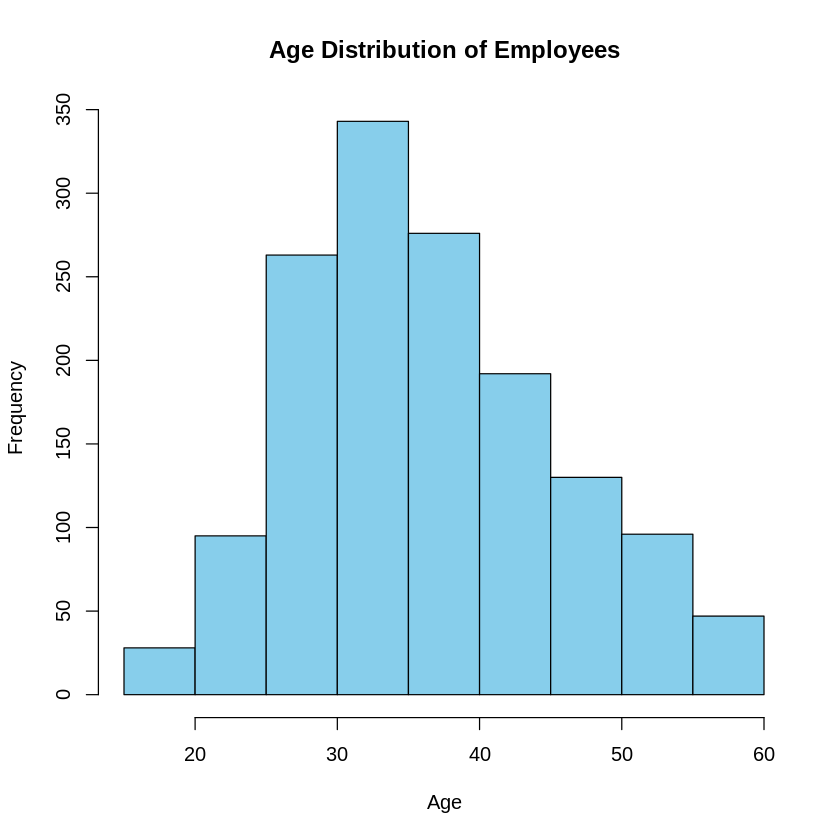

In [16]:
summary(data$Age)
hist(data$Age,
     col = "skyblue",
     main = "Age Distribution of Employees",
     xlab = "Age")

The majority of employees fall between 30 and 40 years old.

Very few are below 25 or above 55, showing that the workforce mainly consists of mid-career professionals.

What proportion of employees have left the company?


  No  Yes 
1233  237 

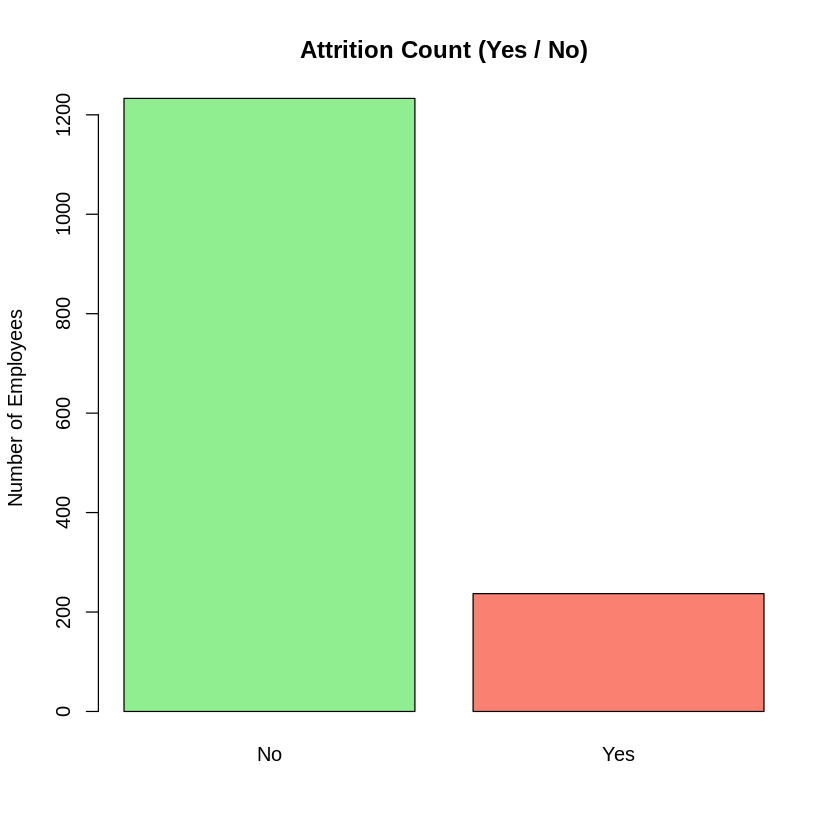

In [17]:
table(data$Attrition)
barplot(table(data$Attrition),
        col = c("lightgreen", "salmon"),
        main = "Attrition Count (Yes / No)",
        ylab = "Number of Employees")

Most employees have not left (Attrition = No).

Around 15–20% show attrition (Attrition = Yes), indicating a moderate turnover rate that’s worth analyzing further.

How are employees distributed across departments?

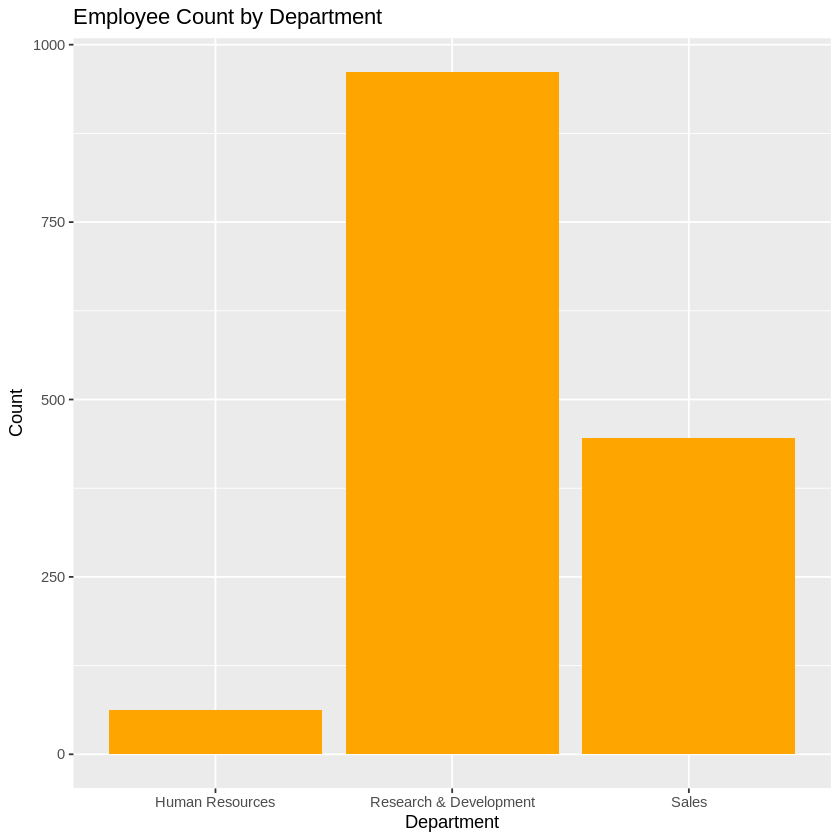

In [18]:
ggplot(data, aes(x = Department)) +
  geom_bar(fill = "orange") +
  labs(title = "Employee Count by Department", x = "Department", y = "Count")

The Research & Development department has the most employees, followed by Sales.

The Human Resources department has the smallest representation.

2. Bivariate Analysis

Does age influence employee attrition?

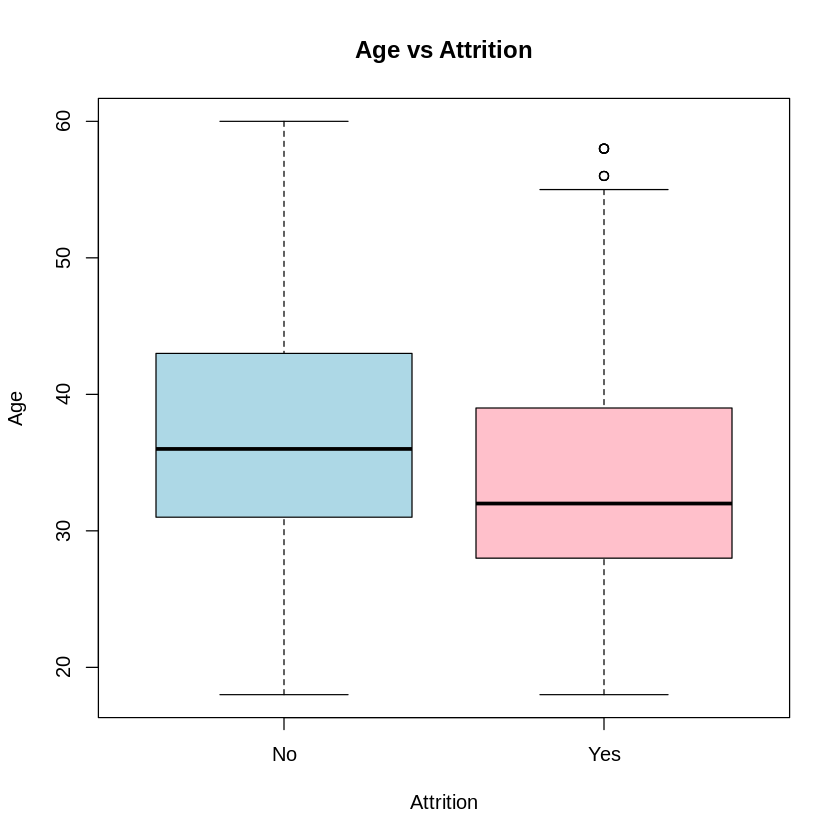

In [19]:
boxplot(Age ~ Attrition,
        data = data,
        col = c("lightblue", "pink"),
        main = "Age vs Attrition",
        xlab = "Attrition",
        ylab = "Age")

Employees who left (Attrition = Yes) tend to be younger than those who stayed.

Suggests younger employees are more likely to leave, possibly seeking better opportunities or career growth.

How does attrition vary across departments?

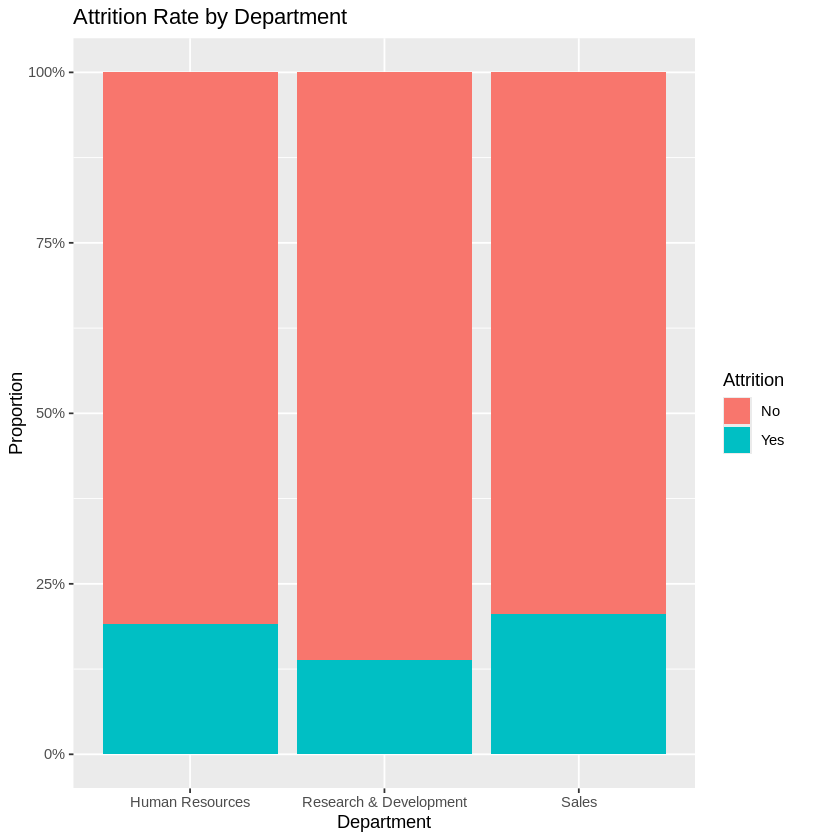

In [20]:
ggplot(data, aes(x = Department, fill = Attrition)) +
  geom_bar(position = "fill") +
  labs(title = "Attrition Rate by Department", y = "Proportion") +
  scale_y_continuous(labels = scales::percent)


Sales shows a higher attrition rate compared to Research & Development.

HR has fewer employees overall but shows some attrition suggesting job satisfaction may differ across departments.

Is there a relationship between daily rate (salary proxy) and distance from home?

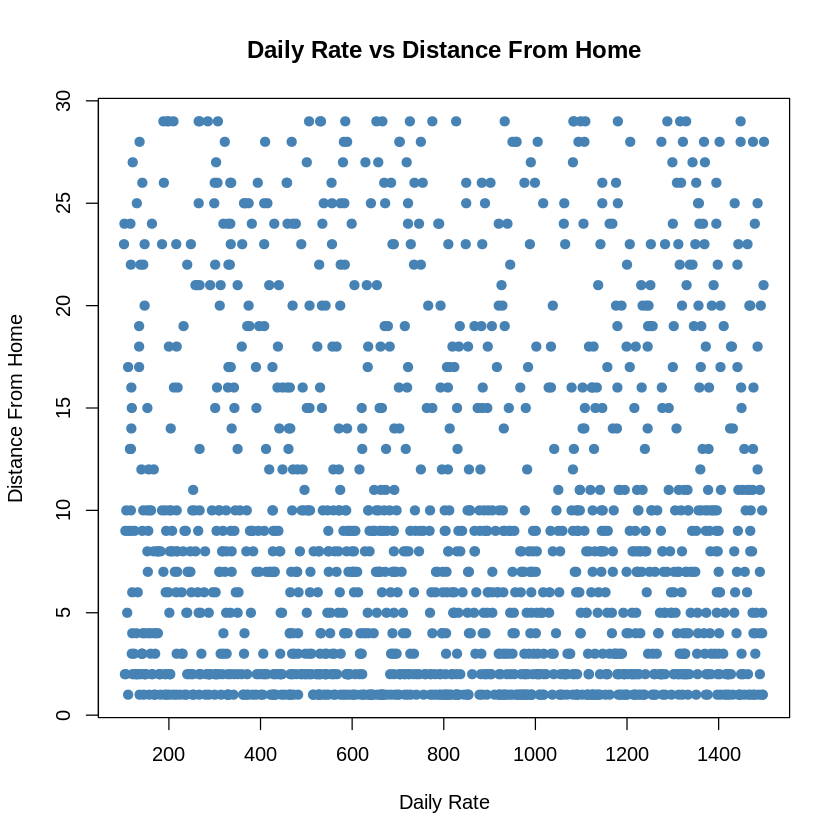

In [21]:
plot(data$DailyRate, data$DistanceFromHome,
     main = "Daily Rate vs Distance From Home",
     xlab = "Daily Rate",
     ylab = "Distance From Home",
     col = "steelblue", pch = 19)

The scatterplot shows no clear correlation — distance from home doesn’t strongly affect pay rate.

Suggests salary is not linked to how far employees live from the office.

How do age and daily rate relate to attrition?

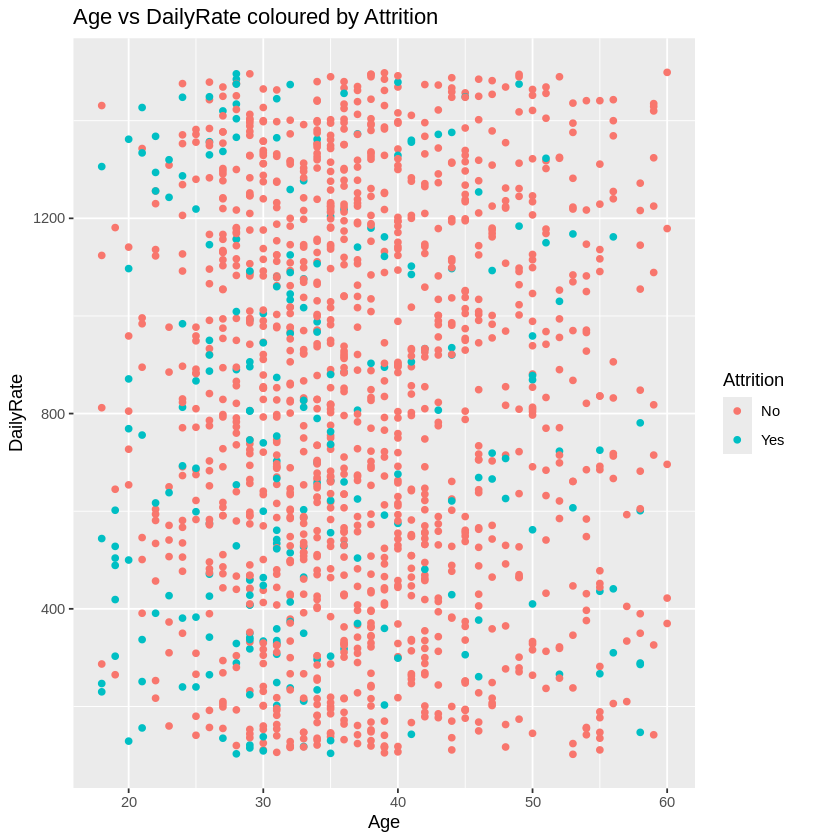

In [22]:
ggplot(data, aes(x = Age, y = DailyRate, color = Attrition)) +
  geom_point() +
  labs(title = "Age vs DailyRate coloured by Attrition")

Employees with lower daily rates and younger ages show slightly more attrition points (colored differently).

Suggests pay and experience might jointly influence the decision to leave.

How does business travel frequency relate to attrition across departments?

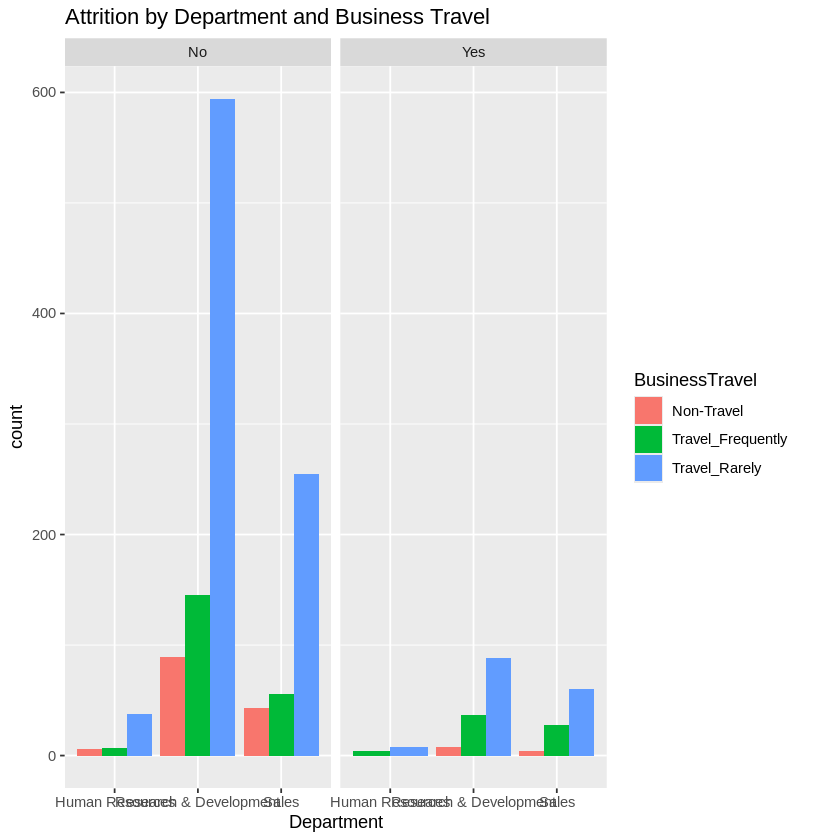

In [23]:
ggplot(data, aes(x = Department, fill = BusinessTravel)) +
  geom_bar(position = "dodge") +
  facet_wrap(~Attrition) +
  labs(title = "Attrition by Department and Business Travel")

In departments like Sales, employees with frequent travel seem to leave more often.

Non-traveling employees in R&D have lower attrition, suggesting travel frequency could contribute to burnout or dissatisfaction.

In [24]:
write.csv(data, "cleaned_hr_data.csv", row.names = FALSE)

Final Conclusion

Your EDA successfully identifies potential drivers of attrition in the company.
Key insights include:

Age and salary appear as major influencing factors younger, lower-paid employees are more likely to leave.

Department and travel also matter, Sales and frequent travelers face higher attrition.

No strong link between distance from home and attrition.

Business Implication:
HR can use these insights to:

Improve retention in Sales and among younger staff.

Offer growth opportunities or travel compensation to reduce turnover.

Focus on career development and pay structure for high-risk employee segments.